# Email Spam Classifier Using Naive Bayes Algorithm

**Author Name:** Haider Rasool Qadri

**Email:** haiderqadri.07@gmail.com

**Github:** [link](https://github.com/HaiderQadri)

**Linkedin** [link](www.linkedin.com/in/haider-rasool-qadri-06a4b91b8)

# About the Dataset

- This dataset is collected from the following source [link](https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification)

**Context:**
 TO CLASSIFY THE MAIL AS SPAM OR HAM BY USING MACHINE LEARNING MODEL.

**Content**
This is the dataset in which some randomly mails are collected and classified as spam or ham.

1st column contains spam/ham classification \
2nd column have the mail itself

## Aim of Analysis
- The aim of this analysis is to develop a robust email spam detection system using machine learning techniques. By analyzing the content and characteristics of emails, the system should be able to accurately classify incoming emails as either spam or ham.

# Import the liberaries 

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for performing numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # also for data visualization
import string # to handle the special characters
import warnings # to ignore warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # convert category data into numerical data
import nltk # natural language processing liberary
from nltk.stem.porter import PorterStemmer # for text stemming
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import the dataset using pandas liberary

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin-')

# Exploratory data analysis (EDA)

- Let's have a look of the data

In [4]:
df.head(5) # to see the first five rows of the dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- **By looking at the dataframe my first observation is that:**
1. Dataframe should only contain two coulumns other three columns are useless.
2. The names of the coulumns must have some meaning 

- **Let's first remove unwanted columns**

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- **Now, rename the column names**

In [5]:
df = df.rename(columns = {'v1': 'target',
'v2': 'text'
})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- **Let's have a look on some basic information of the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


The data set contains 5572 rows and 2 columns\
Data type of both the columns is object

- **Let's have a look on the statistical summany of the data**
   
  Since both columns are of object data type so we are unable to see statistical summary because statistical summary is only for numerical values

- **Let's have a look on the missing values using pandas liberary**

In [7]:
df.isnull().sum().sort_values(ascending = False)

target    0
text      0
dtype: int64

 No missing values in the dataset

- **Check the shape of dataset**

In [8]:
df.shape

(5572, 2)

- **Now, check for duplicates in the data**

In [9]:
df.duplicated().sum()


403

403 rows found duplicated in the dataset

- **Droping duplicates from the dataset**

In [10]:
df = df.drop_duplicates(keep = 'first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

We have dropped duplicated values from the dataset

In [13]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- **Let's check the percentage of ham and spam mails in the data**

In [14]:
values = df['target'].value_counts() # checking the value count of ham and spam
values

target
ham     4516
spam     653
Name: count, dtype: int64

In [15]:
total_values = values.sum() # sum of ham and spam
total_values

5169

In [16]:
percent_ham = values[0] / total_values * 100 # percentage of ham 
percent_spam = values[1] / total_values *100 # percentage of spam 

In [17]:
print(f"The percentage of ham mails is: {percent_ham}")
print(f"The percentage of spam mails is: {percent_spam}")


The percentage of ham mails is: 87.3669955503966
The percentage of spam mails is: 12.633004449603405


- **Visualizing percentage of ham and spam mails**

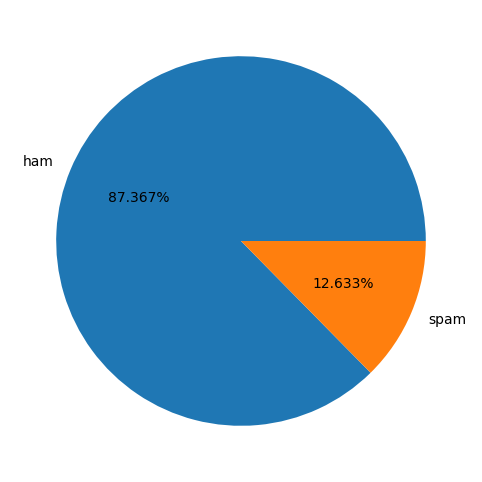

In [18]:
plt.figure(figsize = (12, 6))
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct="%0.3f%%")
plt.show()

Here , we can see that 87.367% of data is consumed by mails and other is by spam mails

In [19]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- **Encoding text column which is categorical into numerical value using LabelEncoder**

In [20]:
le = LabelEncoder() # calling LabelEncoder
df['target'] = le.fit_transform(df['target']) # fitting the data into LabelEncoder
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


target column is encoded into numerical values in which 0 shows 'ham' and 1 shows 'spam' mails

In [21]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


- **Let's extract the number of characters, words and sentences from the text so that we can easly analyise ham and spam mails**

In [22]:
df['num_char'] = df['text'].apply(lambda x: len(x)) # extracts the number of characters from the text message
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # extracts the number of words from the text message
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # extracts the number of sentences from the text message
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_char', 'num_words', 'num_sent']]

,num_char,num_words,num_sent
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [26]:
# statistical summary of the data
df[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


- **Now, let's filter the data and look at the statistical summaries of individual ham and spam data**

In [27]:
# Observation regarding ham mails
df[df['target'] == 0] [['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Observation regarding spam mails
df[df['target'] == 1] [['num_char', 'num_words', 'num_sent']].describe()


,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


- **Let's now draw a histogram that compares the number of charecters in ham and spam mails**

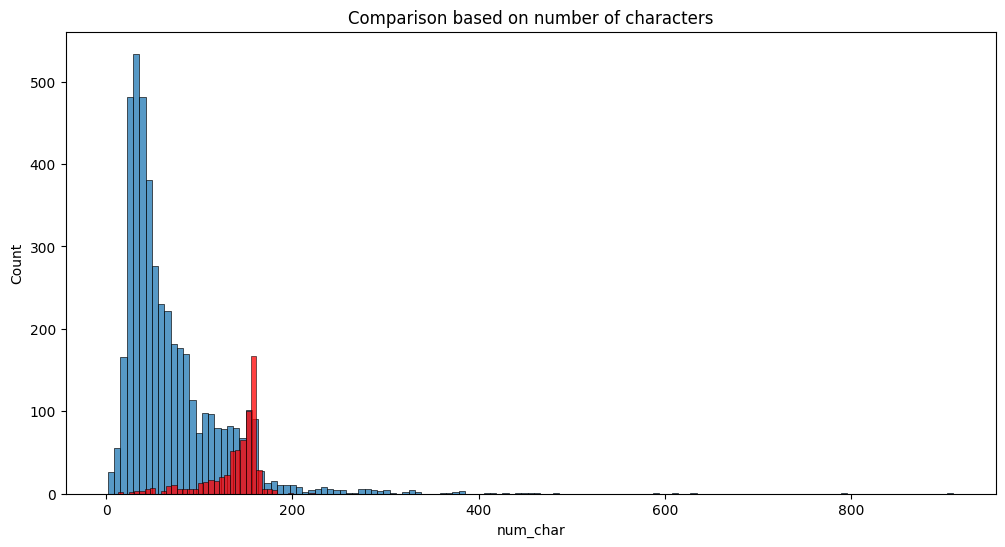

In [29]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_char']) # for ham 
sns.histplot(df[df['target'] == 1]['num_char'], color = 'red') # for spam
plt.title('Comparison based on number of characters')
plt.show()

Here, we can see that the number of characters in the ham mail greater than the spam mail.

- **Let's see the correlation between them**

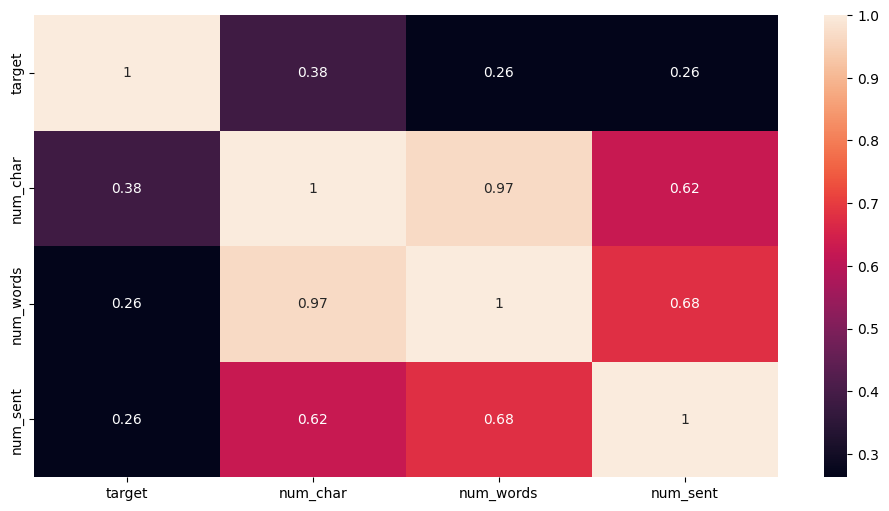

In [30]:
plt.figure(figsize = (12, 6))
sns.heatmap(df[['target', 'num_char', 'num_words', 'num_sent']].corr(), annot = True)
plt.show()

The correlation between num_char is very high with the text so we will take it.

In [31]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Data Pre-processing

- **Now, we will define a function which includes:**
1. Convert the uppercase letters into lowercase
2. Tokenize the text
3. Romove the special characteristics
4. Remove stopwords and punctuation
5. Stemming

In [32]:
# calling the PorterStemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [33]:
df['transformed_text'] = df['text'].apply(transform_text) # applying function on the text column
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


So, we created a new column named as transformed_text in which all the letters are lower case with no special characteristics, stepwords and punctuations.

- **Now let's visualize the text using WordCloud**

In [34]:
from wordcloud import WordCloud # for text visualization
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

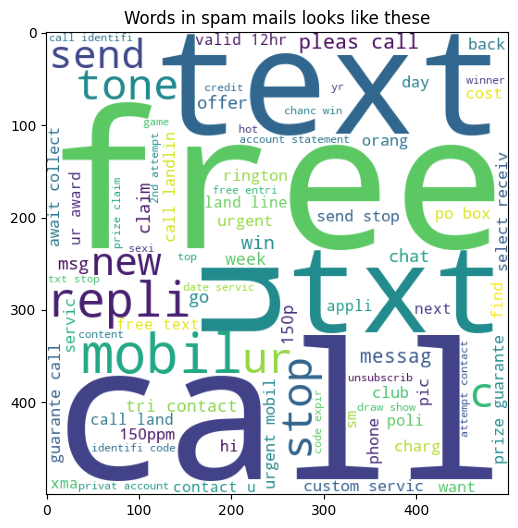

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize = (12,6))
plt.title('Words in spam mails looks like these')
plt.imshow(spam_wc)
plt.show()

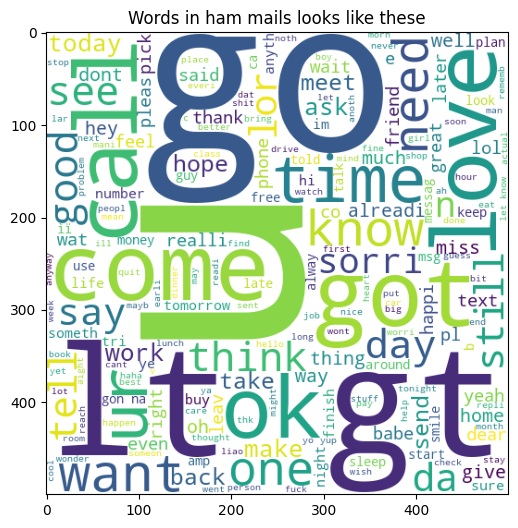

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize = (12,6))
plt.title('Words in ham mails looks like these')
plt.imshow(ham_wc)
plt.show()

# Model Building

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # calling countvectorizer
tfidf = TfidfVectorizer(max_features = 3000) # calling tfidfvectorizer

- **Spliting the data into features (X) and labels (y)**

In [38]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

- **Now, spliting the data into X_train, X_test, y_train and y_train**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,train_size = 0.80, random_state = 2)

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [41]:
# initializing the algorithms 
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Traning and Evaluating the model

In [42]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.8694390715667312
Precision Score:  0.5068493150684932


In [49]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred2))
print("Precision Score: ",precision_score(y_test,y_pred2))

Accuracy Score:  0.9709864603481625
Precision Score:  1.0


In [50]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred3))
print("Precision Score: ",precision_score(y_test,y_pred3))

Accuracy Score:  0.9835589941972921
Precision Score:  0.991869918699187


# Conclusions

- Among three models two models Multinomial NB and Bernoulli NB performs very well, with high accuracy score.
- Bernoulli NB leads in accuracy of 98% followed by Multinomial NB 97%, and Gaussain NB 87%.
- Multinomial NB achieves perfect precision of 100%, indicating that it has predicted correct all the time.

# Appreciation
Appreciate your time exploring my work. If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook.

Happy Learning!